# Project team's ID : PTID-CDS-OCT-23-1668

# Client: Sales Effectiveness | Category: Product Sales

# Project Ref: PRCL-0019

## Business Case Summary: Enhancing Sales Effectiveness through Machine Learning

### Company Overview:
FicZon Inc is a prominent IT solution provider offering a diverse range of products, including on-premises solutions and Software as a Service (SAAS) offerings. With a primary focus on digital channels and website-driven leads, FicZon has historically thrived on effective sales force management.

### Market Challenges:
In the face of a maturing market and increased competition, FicZon is witnessing a decline in sales performance. The traditional reliance on manual lead categorization, heavily dependent on the sales team, has become a bottleneck. Lead quality, a pivotal factor in sales effectiveness, is currently determined through post-analysis rather than in real-time.

### Opportunity for Improvement:
Recognizing the need for innovation, FicZon aims to leverage Machine Learning (ML) to revolutionize the lead categorization process. The objective is to pre-categorize leads based on ML algorithms, providing a more accurate and timely assessment of lead quality.

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
!pip install mysql-connector-python
import mysql.connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 34.1 MB/s eta 0:00:00


In [4]:
db = mysql.connector.connect(host = '18.136.157.135', user = 'dm_team2',
                             password = 'DM!$Team&27@9!20!', database = 'project_sales')

In [8]:
## check the number of database available on the server
new = pd.read_sql_query('show tables', db)

print(new)

<ipython-input-8-247da68500eb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  new = pd.read_sql_query('show tables', db)


  Tables_in_project_sales
0                    data


In [9]:
table_name = 'data'
table_details = pd.read_sql_query(f'DESCRIBE {table_name}', db)
print(table_details)

<ipython-input-9-319e2d402498>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table_details = pd.read_sql_query(f'DESCRIBE {table_name}', db)


           Field          Type Null Key Default Extra
0        Created  varchar(150)  YES        None      
1     Product_ID  varchar(150)  YES        None      
2         Source  varchar(150)  YES        None      
3         Mobile  varchar(150)  YES        None      
4          EMAIL  varchar(150)  YES        None      
5    Sales_Agent  varchar(255)  YES        None      
6       Location  varchar(255)  YES        None      
7  Delivery_Mode  varchar(255)  YES        None      
8         Status  varchar(255)  YES        None      


In [12]:
query = 'select * from data'
sales = pd.read_sql(query, db)
sales

<ipython-input-12-53bc86ea2a67>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales = pd.read_sql(query, db)


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


### The analysis of how different columns relate to the target variable 'Status' has been conducted. Here's a brief summary for each column:

#### Created:
The 'Created' column, which likely represents the timestamp of when the sales lead was created, shows varying       counts across different 'Status' categories. This suggests that the time of lead creation might influence the eventual status of the lead.

#### Product_ID:
The relationship between 'Product_ID' and 'Status' would show if certain products are more likely to result in a sale or a lost lead. However, this is a numeric column with a small number of unique values, so a more detailed analysis would be needed to draw conclusions.

#### Source:
This column indicates the source of the lead. The relationship between 'Source' and 'Status' can reveal which sources are more effective in generating successful leads.

#### Mobile:
 Although this column has a significant number of missing values, the relationship between the provided mobile numbers and 'Status' could indicate if the presence of a mobile number affects the lead's outcome.

#### EMAIL:
The 'EMAIL' column has no missing values, and its relationship with 'Status' could show if certain email domains or patterns correlate with lead outcomes.

#### Sales_Agent:
Different sales agents may have varying success rates, and the relationship between 'Sales_Agent' and 'Status' can highlight agent performance.

#### Location:
The 'Location' column's relationship with 'Status' could indicate if geographical factors play a role in the success of sales leads.

#### Delivery_Mode:
This column's relationship with 'Status' might reveal if the mode of delivery influences the lead's outcome.

# Basic checks

In [13]:
#getting the first five rows
sales.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [14]:
#getting the last five rows
sales.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [15]:
##To check data type and null values for all columns
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [16]:
##Used to view some basic statistical details like percentile,mean,std etc.
sales.describe()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [17]:
#It will give you info about categorical data/columns
sales.describe(include='O')

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [18]:
#checking how many null values are present in data
sales.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

# Domain Analysis

In [19]:
domain_analysis=pd.DataFrame({
    'Data Type':sales.dtypes,
    'Unique count':sales.nunique(),
    'Missing values':sales.isnull().sum(),
    '% Missing values':(sales.isnull().sum()/len(sales)*100)
}).reset_index()

domain_analysis.rename(columns={'index':'column'},inplace=True)

domain_analysis

,column,Data Type,Unique count,Missing values,% Missing values
0,Created,object,6752,0,0.0
1,Product_ID,object,30,0,0.0
2,Source,object,26,0,0.0
3,Mobile,object,487,0,0.0
4,EMAIL,object,883,0,0.0
5,Sales_Agent,object,13,0,0.0
6,Location,object,18,0,0.0
7,Delivery_Mode,object,5,0,0.0
8,Status,object,11,0,0.0


### The domain analysis of the dataset reveals the following insights:

1) The 'Created' column is of object type with no missing values, indicating it likely contains date-time information.
2) 'Product_ID' is a numeric column with a small number of unique values and a few missing entries.
3) 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode', and 'Status' are all object types, suggesting they contain categorical data.
4) The 'Mobile' column has a significant number of missing values, over 24%.
5) 'Product_ID' and 'Location' have a small percentage of missing values, less than 1%.
6) 'Source' and 'Sales_Agent' have very few missing values.
7) 'EMAIL', 'Delivery_Mode', and 'Status' columns have no missing values.

# Data Preprocessing

In [20]:
sales.head(10)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
5,14-11-2018 07:33,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
6,14-11-2018 05:58,,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
7,14-11-2018 05:49,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
8,14-11-2018 05:40,,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,,Mode-5,Open
9,14-11-2018 05:06,,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [21]:
sales.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [22]:
#dropping the columns which are no use in analysis

sales.drop("EMAIL",axis=1,inplace=True)
sales.drop("Mobile",axis=1,inplace=True)
sales.drop("Created",axis=1,inplace=True)

In [23]:
sales.shape

(7422, 6)

In [24]:
sales.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [25]:
# Dropping rows with missing data because they are few
sales.replace('',np.nan,inplace=True)
sales.dropna(inplace=True)
sales.reset_index(inplace=True,drop=True)
sales.shape

(7328, 6)

In [26]:
# Compressing and Merging the labels in column

sales.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
sales.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
sales.Source.replace('By Recommendation','Customer Referral',inplace=True)
sales.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
sales.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [27]:
#checked value_counts of source column Afer compressing and merging the label in column
sales['Source'].value_counts()

Live Chat            2663
Call                 2536
Website              1736
Customer Referral     212
Existing Customer     145
Campaign               36
Name: Source, dtype: int64

In [28]:
#checked value_counts of location column before Compressing and Merging the labels in column
sales['Location'].value_counts()

Other Locations    2481
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [29]:
## Compressing and Merging the labels in column
sales.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
sales.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [30]:
#checked value_counts of Location column Afer compressing and merging the label in column
sales['Location'].value_counts()

Other Locations    2595
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Foreign             212
Pune                139
Name: Location, dtype: int64

In [31]:
sales['Product_ID'].value_counts()

18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
3        7
6        7
8        6
17       6
13       4
16       3
24       2
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [49]:
sales.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [33]:
#checked value_counts of status column before Compressing and Merging the labels in column
sales['Status'].value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

In [34]:
# Defining 'Status' as 'Good' or 'Bad'
sales.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Good',inplace=True)
sales.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Bad',inplace=True)

In [35]:
#checked value_counts of status column after Compressing and Merging the labels in column
sales['Status'].value_counts()

Bad     4466
Good    2862
Name: Status, dtype: int64

In [36]:
sales.head(10)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9,Live Chat,Sales-Agent-3,Bangalore,Mode-1,Good
1,19,Call,Sales-Agent-4,Other Locations,Mode-5,Good
2,18,Website,Sales-Agent-11,Other Locations,Mode-1,Good
3,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Bad
4,18,Call,Sales-Agent-7,Bangalore,Mode-1,Good
5,18,Live Chat,Sales-Agent-9,Other Locations,Mode-3,Bad
6,27,Call,Sales-Agent-11,Chennai,Mode-5,Good
7,19,Live Chat,Sales-Agent-4,Foreign,Mode-2,Good
8,19,Live Chat,Sales-Agent-4,Foreign,Mode-4,Bad
9,18,Call,Sales-Agent-7,Bangalore,Mode-1,Bad


# Exploratory Data Analysis

In [37]:
#importing  matplot library for visualization
import matplotlib.pyplot as plt

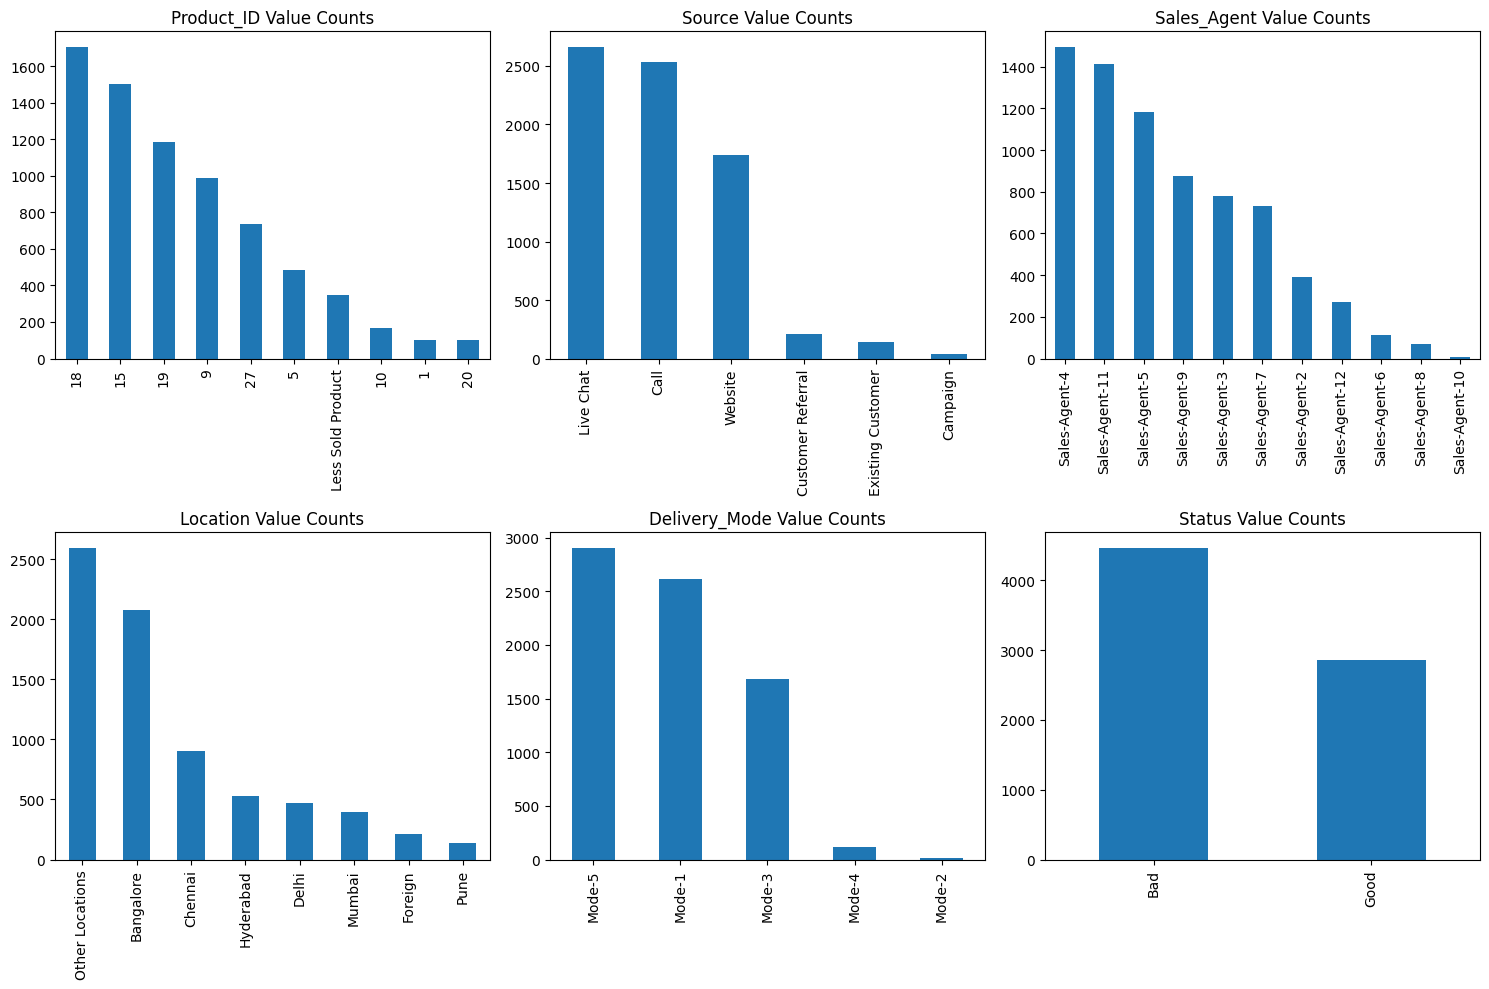

In [38]:
# Plotting the labels in each column
plt.figure(figsize=(15,10))

# Product_ID value counts
plt.subplot(2,3,1)
sales['Product_ID'].value_counts().plot(kind='bar')
plt.title('Product_ID Value Counts')

# Source value counts
plt.subplot(2,3,2)
sales['Source'].value_counts().plot(kind='bar')
plt.title('Source Value Counts')

# Sales_Agent value counts
plt.subplot(2,3,3)
sales['Sales_Agent'].value_counts().plot(kind='bar')
plt.title('Sales_Agent Value Counts')

# Location value counts
plt.subplot(2,3,4)
sales['Location'].value_counts().plot(kind='bar')
plt.title('Location Value Counts')

# Delivery_Mode value counts
plt.subplot(2,3,5)
sales['Delivery_Mode'].value_counts().plot(kind='bar')
plt.title('Delivery_Mode Value Counts')

# Status value counts
plt.subplot(2,3,6)
sales['Status'].value_counts().plot(kind='bar')
plt.title('Status Value Counts')

plt.tight_layout()
plt.show()

### Here are the insights from the bar charts visualizing the value counts for various columns
#### Product_ID:
The chart for Product_ID shows the frequency of each product in the dataset. Some products appear more frequently, which could indicate higher sales volume or popularity.

#### Source:
The Source chart would highlight which lead sources are most commonly used. A high frequency for a particular source could suggest it is a major channel for lead generation.

#### Sales_Agent:
The Sales_Agent chart would reveal which agents are handling more leads. Agents with higher counts could be more active or have a larger customer base.

#### Location:
The Location chart would show the distribution of leads across different locations. This could indicate the market reach and where the business efforts are concentrated.

#### Delivery_Mode:
The Delivery_Mode chart would indicate the preferred methods of delivery for products or services. A dominant mode could suggest customer preference or operational efficiency.

#### Status:
The Status chart provides an overview of the outcome of leads.bad leads are more as compared to good leads  

In [39]:
sales.dtypes

Product_ID       object
Source           object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [ ]:
!pip install sweetviz

In [119]:
# For reference analyzing data using sweetviz
import sweetviz as sv
report = sv.analyze(sales)

                                             |          | [  0%]   00:00 -> (? left)

In [120]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Encoding Categorical Variables

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    sales.iloc[:,i] = enc.fit_transform(sales.iloc[:,i])
sales.head()

<ipython-input-41-be463f5dac50>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sales.iloc[:,i] = enc.fit_transform(sales.iloc[:,i])
<ipython-input-41-be463f5dac50>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sales.iloc[:,i] = enc.fit_transform(sales.iloc[:,i])
<ipython-input-41-be463f5dac50>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,8,4,4,0,0,1
1,4,0,5,6,4,1
2,3,5,1,6,0,1
3,2,5,8,4,0,0
4,3,0,8,0,0,1


In [42]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int64
 1   Source         7328 non-null   int64
 2   Sales_Agent    7328 non-null   int64
 3   Location       7328 non-null   int64
 4   Delivery_Mode  7328 non-null   int64
 5   Status         7328 non-null   int64
dtypes: int64(6)
memory usage: 343.6 KB


# Feature Engineering

In [43]:
# Checking the correlation coeffecient
sales.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.074868,0.056065,-0.226961,-0.181464,0.138943
Source,0.074868,1.000000,-0.023186,-0.003034,-0.216516,-0.015411
Sales_Agent,0.056065,-0.023186,1.000000,-0.140876,-0.224688,0.137074
Location,-0.226961,-0.003034,-0.140876,1.000000,0.414193,-0.347418
Delivery_Mode,-0.181464,-0.216516,-0.224688,0.414193,1.000000,-0.220445
Status,0.138943,-0.015411,0.137074,-0.347418,-0.220445,1.000000


<Axes: >

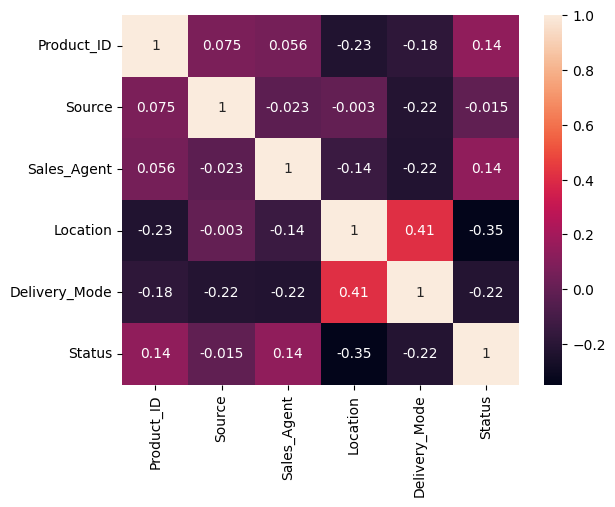

In [45]:
sns.heatmap(sales.corr(),annot=True)

In [46]:
#splitting dataset into x and y

x=sales.iloc[:,:-1]
y=sales.Status

In [47]:
x

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,8,4,4,0,0
1,4,0,5,6,4
2,3,5,1,6,0
3,2,5,8,4,0
4,3,0,8,0,0
...,...,...,...,...,...
7323,8,0,7,5,3
7324,2,0,2,6,4
7325,7,4,1,0,0
7326,9,3,5,6,0


In [51]:
y

0       1
1       1
2       1
3       0
4       1
       ..
7323    0
7324    0
7325    0
7326    0
7327    1
Name: Status, Length: 7328, dtype: int64

In [52]:
# Splitting into training and testing data for accuracy
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
x_train.shape

(5862, 5)

In [54]:
x_test.shape

(1466, 5)

In [55]:
#training the model

from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier()
params=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_gridtree=GridSearchCV(classifier_tree,params,)

# Models

## 1) Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

#training the model

log_regressor=LogisticRegression()
log_regressor.fit(x_train,y_train)

LogisticRegression()

In [57]:
#predicting the model

y_pred_log_regressor=log_regressor.predict(x_test)
y_pred_log_regressor

array([1, 1, 1, ..., 1, 1, 1])

In [114]:
#finding accuracy,clasification report

acc_LR = accuracy_score(y_test,y_pred_log_regressor)
print(accuracy_score(y_test,y_pred_log_regressor))
print(classification_report(y_test,y_pred_log_regressor))

0.6889495225102319
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       887
           1       0.62      0.56      0.59       579

    accuracy                           0.69      1466
   macro avg       0.67      0.67      0.67      1466
weighted avg       0.68      0.69      0.69      1466



In [59]:
#finding confusion matrix

print(confusion_matrix(y_test,y_pred_log_regressor))

[[687 200]
 [256 323]]


## 2) Support Vector Machine

In [60]:
#training the model

from sklearn.svm import SVC

params={'kernel':['rbf'],'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10],'C':[0.001, 0.01, 0.1, 1, 10]}
rbf_svc=GridSearchCV(SVC(),params,cv=5)
rbf_svc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']})

In [61]:
#checking the best parameters
rbf_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [62]:
#predicting the model
y_pred_svc=rbf_svc.predict(x_test)
y_pred_svc

array([0, 1, 1, ..., 1, 0, 1])

In [113]:
#finding accuracy,clasification report

acc_SVM = accuracy_score(y_test,y_pred_svc)
print(accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

0.708731241473397
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       887
           1       0.66      0.54      0.59       579

    accuracy                           0.71      1466
   macro avg       0.70      0.68      0.68      1466
weighted avg       0.70      0.71      0.70      1466



In [65]:
#finding confusion matrix

print(confusion_matrix(y_test,y_pred_svc))

[[729 158]
 [269 310]]


## 3) Decision Tree with GridsearchCV

In [66]:
#training the model

from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier(random_state=42,splitter='best')
params=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_gridtree=GridSearchCV(classifier_tree,params,scoring='accuracy',cv=10)
model_gridtree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [67]:
#get the best parameters

model_gridtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [68]:
#predicting the model
y_pred_tree=model_gridtree.predict(x_test)
y_pred_tree

array([0, 1, 1, ..., 1, 1, 1])

In [112]:
#finding accuracy ,classification report and confusion matrix

acc_DT = accuracy_score(y_test,y_pred_tree)
print(accuracy_score(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))
print(confusion_matrix(y_test,y_pred_tree))


0.7080491132332879
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       887
           1       0.65      0.58      0.61       579

    accuracy                           0.71      1466
   macro avg       0.69      0.69      0.69      1466
weighted avg       0.70      0.71      0.70      1466

[[704 183]
 [245 334]]


## 4) Random Forest with GridsearchCv

In [74]:
#training the model

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
params = {
    'n_estimators': [20,30,50,70,80],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

rfc_grid=GridSearchCV(rfc,params,scoring='accuracy',cv=10)
rfc_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 30, 50, 70, 80]},
             scoring='accuracy')

In [75]:
rfc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [76]:
#predicting the model

y_pred_rfc=rfc_grid.predict(x_test)
y_pred_rfc

array([0, 1, 1, ..., 1, 1, 1])

In [111]:
#finding accuracy ,classification report and confusion matrix

acc_RF = accuracy_score(y_test,y_pred_rfc)
print(accuracy_score(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))

0.7285129604365621
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       887
           1       0.67      0.61      0.64       579

    accuracy                           0.73      1466
   macro avg       0.72      0.71      0.71      1466
weighted avg       0.73      0.73      0.73      1466

[[713 174]
 [224 355]]


## 5) Naive Bayes Bernoulli

In [70]:
#training the model

from sklearn.naive_bayes import BernoulliNB
model_nb=BernoulliNB()
model_nb.fit(x_train,y_train)

BernoulliNB()

In [71]:
#predicting the model

y_pred_nb=model_nb.predict(x_test)
y_pred_nb

array([1, 1, 1, ..., 1, 1, 0])

In [110]:
#finding accuracy , classification report and confusion matrix

acc_NB = accuracy_score(y_test,y_pred_nb)
print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

0.6684856753069577
              precision    recall  f1-score   support

           0       0.69      0.81      0.75       887
           1       0.61      0.46      0.52       579

    accuracy                           0.67      1466
   macro avg       0.65      0.63      0.63      1466
weighted avg       0.66      0.67      0.66      1466

[[716 171]
 [315 264]]


## 6) K-Nearest Neighbor with GridSearchCV

In [78]:
#training the model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,10]}
knn_grid=GridSearchCV(knn,params,scoring='accuracy',cv=10)
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10]}, scoring='accuracy')

In [79]:
# predicting the model
y_pred_knn=knn_grid.predict(x_test)
y_pred_knn

array([0, 1, 1, ..., 1, 0, 1])

In [109]:
#finding accuracy ,classification report and confusion matrix

acc_KNN = accuracy_score(y_test,y_pred_knn)
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))

0.6950886766712142
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       887
           1       0.64      0.52      0.58       579

    accuracy                           0.70      1466
   macro avg       0.68      0.67      0.67      1466
weighted avg       0.69      0.70      0.69      1466

[[716 171]
 [276 303]]


## 7) XGBoost Classifier

In [ ]:
!pip install xgboost

In [87]:
#training the model
from xgboost import XGBClassifier
xgb_classifier =XGBClassifier(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    objective='binary:logistic',
    eval_metric='logloss'
)
xgb_classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [88]:
#predicting the model

y_pred_xgb=xgb_classifier.predict(x_test)
y_pred_xgb

array([0, 1, 1, ..., 1, 1, 1])

In [108]:
#finding the accuracy ,classification report and confusion matrix

acc_XGB = accuracy_score(y_test,y_pred_xgb)
print(accuracy_score(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

0.7407912687585266
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       887
           1       0.68      0.64      0.66       579

    accuracy                           0.74      1466
   macro avg       0.73      0.72      0.73      1466
weighted avg       0.74      0.74      0.74      1466

[[715 172]
 [208 371]]


## 8) Artificial Neural Network

In [81]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(x_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [82]:
#testing the model

y_pred_mlp=model_mlp.predict(x_test)
y_pred_mlp

array([1, 1, 1, ..., 1, 0, 0])

In [107]:
#finding accuracy , classification report and confusion matrix

acc_ANN = accuracy_score(y_test,y_pred_mlp)
print(accuracy_score(y_test,y_pred_mlp))
print(classification_report(y_test,y_pred_mlp))
print(confusion_matrix(y_test,y_pred_mlp))

0.6903137789904502
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       887
           1       0.63      0.53      0.57       579

    accuracy                           0.69      1466
   macro avg       0.67      0.66      0.67      1466
weighted avg       0.68      0.69      0.68      1466

[[706 181]
 [273 306]]


In [ ]:
!pip install tabulate

In [90]:
from tabulate import tabulate

In [115]:
data1 = [["LR", acc_LR],
        ["SVM", acc_SVM],
        ["Naive-Bayes", acc_NB],
        ["Decision Tree", acc_DT],
        ["KNN", acc_KNN],
        ["XGBoost", acc_XGB],
        ["Random Forest", acc_RF],
        ["ANN", acc_ANN]]

col_names1 = ["Algorithm", "Accuracy Score"]

print(tabulate(data1, headers = col_names1, tablefmt = "fancy_grid", floatfmt = ".2%"))

╒═══════════════╤══════════════════╕
│ Algorithm     │   Accuracy Score │
╞═══════════════╪══════════════════╡
│ LR            │           68.89% │
├───────────────┼──────────────────┤
│ SVM           │           70.87% │
├───────────────┼──────────────────┤
│ Naive-Bayes   │           66.85% │
├───────────────┼──────────────────┤
│ Decision Tree │           70.80% │
├───────────────┼──────────────────┤
│ KNN           │           69.51% │
├───────────────┼──────────────────┤
│ XGBoost       │           74.08% │
├───────────────┼──────────────────┤
│ Random Forest │           72.85% │
├───────────────┼──────────────────┤
│ ANN           │           69.03% │
╘═══════════════╧══════════════════╛


**SUMMARY OF THE PROJECT**

FicZon Inc, an IT solution provider, relies heavily on digital channels for leads, particularly through their website. With a significant dependence on sales force effectiveness, FicZon has experienced a decline in sales due to market maturation and increased competition.

The current lead quality assessment relies on manual categorization by the sales staff, with a post-analysis focus. Recognizing the need for improvement, FicZon initiated a project with the goal of leveraging Machine Learning (ML) to pre-categorize leads, anticipating a substantial boost in sales effectiveness.

The project's primary objectives included data exploration insights into sales effectiveness and the development of an ML model capable of predicting lead categories (High Potential or Low Potential). Various machine learning models were employed to achieve these goals.

The implementation of ML aimed to enhance the accuracy and efficiency of lead categorization, ensuring a proactive approach to sales, and addressing the challenges posed by market dynamics and emerging competitors.

The dataset for the Business case was obtained through SQL server using MySQL Workbench. It has 7422 rows × 9 columns with column names as 'Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent', 'Location', 'Delivery_Mode' and 'Status'. The dataset contains all these details for 7422 products which were sold to different customers.

It is a Supervised Leraning Classification problem with input features as Categorical Data and target as the 'Status' where different values are recorded providing whether that particular Product is at what stage (Open, lost, Just Enquiry etc). The predictor variables as well as the target variable 'Status' is nominal type.

Machine Learning algorithms used:

1. Logistic Regression
2. Support Vector Machine
3. Decision Tree with GridSearchCV
4. Random Forest with GridSearchCV
5. Naive Bayes Bernoulli
6. K-nearest Neighbours
7. XGBoost Classifier
8. Artificial Neural Network






**Methodology:**

Most of the columns have a lot of different unique labels. Hence, these labels were merged and new labels were formed categorizing the labels with similar features into one group. After categorizing, the categorical data were converted to Numerical type using Label Encoding Technique.

The Target variable 'Status' was categorized into 'Good' and 'Bad' which referred to High Potential and Low Potential Lead respectively.

SMOTE is used for balancing the sample data. After various Data Preprocessing and Feature Engineering Process, different Machine Learning Algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, XGBoost, K-NN, A-NN and Naive-Bayes alogorithms were used for prediction.

**CONCLUSION**

The Main purpose of the project was to find out the Lead Quality which can significantly increase the sales.

After trying various Machine Learning Model on the given data set, based on the Accuracy score, Recall score, Precision score and F1 score, it can be concluded that out of all the algorithms, **XGBoost Classifier** is performing best with highest accuracy score.

**It can concluded that XGBoost alogorithm is the best performing model on this Data set.**